In [3]:
# Time wrapper
from functools import wraps
import time

def timer(func):
    @wraps(func)
    def timer_wrapper(*args, **kwargs):
        start = time.perf_counter() ## time.perf_counter() gives the time in seconds
        result = func(*args, **kwargs)
        end = time.perf_counter()
        total_time = end - start
        print(f'Function {func.__name__}{args} {kwargs}, {total_time:.5f} seconds') ## Print the function and the time that it takes
        return total_time
    return timer_wrapper

# Homework 3

### 1. Merge two sorted lists

1. Assume you have two sorted linked lists. Use **recursion** to merge these lists and return a new sorted list. 

For example:

- Input: 

> L1 = 1 -> 3 -> 5 -> 7 -> null

> L2 = 2 -> 4 -> 6 -> null

- Output:

> L4 = 1 -> 2 -> 3-> 4 -> 5 -> 6 -> 7 -> null

2. Calculate complexity

In [4]:
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None):
        self.val = val
        self.next_node = None
    
    def set_next_node(self, next_node):
        self.next_node = next_node

In [5]:
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        self.head_node = head_node
        
    def list_traversed(self):
        node = self.head_node
        while node:
            print(node.val)
            node = node.next_node


In [6]:
def mergeLists(l1, l2):
        pointer = None
        if l1 is None:
            return l2
        
        if  l2 is None:
            return l1

        if l1.val <= l2.val:
            pointer = l1
            pointer.next_node = mergeLists(l1.next_node, l2)
        else:
            pointer = l2
            pointer.next_node = mergeLists(l1, l2.next_node)
        return pointer

In [7]:
n1 = Node(1)
n2 = Node(2)
n3 = Node(5)
n4 = Node(10)

n1.set_next_node(n2)
n2.set_next_node(n3)
n3.set_next_node(n4)

m1 = Node(4)
m2 = Node(6)
m3 = Node(7)
m4 = Node(8)

m1.set_next_node(m2)
m2.set_next_node(m3)
m3.set_next_node(m4)

In [8]:
list1 = Singly_linked_list(n1)
list2 = Singly_linked_list(m1)

res = Singly_linked_list()
res.head_node = mergeLists(list1.head_node, list2.head_node)
res.list_traversed()


1
2
4
5
6
7
8
10


Time complexity: O(m+n)
Auxiliary space: O(m+n)

### 2. Implement quick sort

1. Use the divide and conquer technique to implement the quick sort algorithm studied in class. 
2. Use a couple of parragraphs to explain the steps of divide and conquer:
    - how/where do you divide?
    - where/what do you conquer?
    - how/what do you combine?
3. Analyze complexity

<img src="1.png">

<img src="2.png">

Complexity
Best case: O(nlog * n)
Worst case: O(n^2)

### 3. Compare quick sort and merge sort

1. Generate 1000 random permutations of arrays of integers between 1 to 10000.
2. Execute merge sort and quick sort for each of the permutations
3. Calculate the execution time of these runs, and compare them using the statistics of the measured executed time.
4. Explain the differences. Which algorithm is better? When would you use each?

In [9]:
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        mergeSort(L)
        mergeSort(R)
        i = j = k = 0
 
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

In [10]:
def partition(array, low, high):
    pivot = array[high]

    i = low - 1

    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
 
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1
 
def quickSort(array, low, high):
    if low < high:
        pi = partition(array, low, high)
        quickSort(array, low, pi - 1)
        quickSort(array, pi + 1, high)

In [11]:
arr = [12, 11, 13, 5, 6, 7]
mergeSort(arr)
print(arr)

[5, 6, 7, 11, 12, 13]


In [12]:
data = [1, 7, 4, 1, 10, 9, -2]
size = len(data)
quickSort(data, 0, size - 1)
print(data)

[-2, 1, 1, 4, 7, 9, 10]


In [13]:
import random

def generateNums():
    arr = []
    for i in range(0, 1000):
        arr.append(random.randint(1,10000))
    return arr

def generateArr():
    arrTotal = []
    for i in range(0, 100):
        arrTotal.append(generateNums())
    return arrTotal

@timer
def testMergeSort():
    arr = generateArr()
    for i in arr:
        mergeSort(i)

@timer
def testQuickSort():
    arr1 = generateArr()
    for i in arr1:
        quickSort(i, 0, len(i)-1)

def testAlg():
    for i in range(0,5):
        print(testMergeSort())
        print(testQuickSort())


testAlg()

Function testMergeSort() {}, 0.39931 seconds
0.3993102999999998
Function testQuickSort() {}, 0.28609 seconds
0.28608679999999964
Function testMergeSort() {}, 0.41901 seconds
0.41900530000000025
Function testQuickSort() {}, 0.29270 seconds
0.29269800000000146
Function testMergeSort() {}, 0.40422 seconds
0.4042192999999976
Function testQuickSort() {}, 0.28439 seconds
0.28438560000000024
Function testMergeSort() {}, 0.40713 seconds
0.4071259000000005
Function testQuickSort() {}, 0.30441 seconds
0.30441379999999896
Function testMergeSort() {}, 0.40130 seconds
0.40129690000000195
Function testQuickSort() {}, 0.29200 seconds
0.2919957000000011


In the case of large data sets merge sort is the best option, and in case of smaller date sets quick sort is the best algorithm that we can chose

### 4. Implement factorials with recursion

Recall that a factorial number is defined as:

$k! = k \times (k-1) \times (k-2) \times ... \times 2 \times 1$

For example: $3! = 3 \times 2 \times 1 = 6$

1. Use recursion to implement the factorial
2. Run your code for numbers between 1 and 10000
3. Calculate the execution time and plot it. 
4. What's the complexity?
5. Implement memoization to improve the performance of your code
6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.
7. What's the complexity of your code using memoization?
8. How does the first implementation and the one with memoization compare?


In [14]:
# Time wrapper
from functools import wraps
import time

def timer(func):
    @wraps(func)
    def timer_wrapper(*args, **kwargs):
        start = time.perf_counter() ## time.perf_counter() gives the time in seconds
        result = func(*args, **kwargs)
        end = time.perf_counter()
        total_time = end - start
        #print(f'Function {func.__name__}{args} {kwargs}, {total_time:.5f} seconds') ## Print the function and the time that it takes
        return total_time
    return timer_wrapper

In [15]:
@timer
def factorial(n):
    if n == 0 or n == 1:
        return 1
    return (n * factorial(n-1))

print(factorial(950))

0.004985100000002518


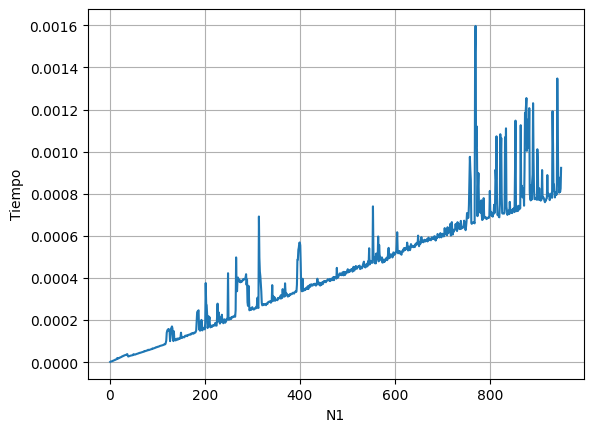

In [16]:
import matplotlib.pyplot as plt

j = list(range(1, 950+1))
arrTime = []
def testFactorial():
    for i in range(1, 950+1):
        arrTime.append(factorial(i))

testFactorial()
#print(j, arrTime)
plt.plot(j, arrTime)
plt.xlabel("N1")
plt.ylabel("Tiempo")
plt.grid()
plt.show()

Complexity: O(n) and space complexity is O(N), thats why at the moment that we try to execute the factorial function with high numbers the RAM of the computer isn't enough

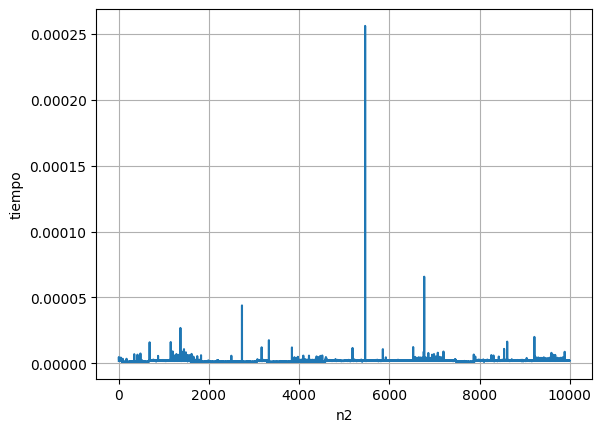

In [17]:
arr = {}
@timer
def factorialMem(n):
    if n < 2: return 1
    if n not in arr:
        arr[n] = n * factorialMem(n-1)
    return arr[n]

num = list(range(1, 10000+1))
arrTime2 = []

def testFactorialMem():
    for i in range(1, 10000+1):
        arrTime2.append(factorialMem(i))

testFactorialMem()
#print(j, arrTime)
plt.plot(num, arrTime2)
plt.xlabel("n2")
plt.ylabel("tiempo")
plt.grid()
plt.show()

Complexity: Memory O(1) Time O(n)